In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import sys, os, pytest
import networkx as nx
import pandas as pd

from ethp2psim.network import Network, NodeWeightGenerator, EdgeWeightGenerator
from ethp2psim.message import Message
from ethp2psim.simulator import Simulator, Evaluator
from ethp2psim.protocols import (
    BroadcastProtocol,
    DandelionProtocol,
    DandelionPlusPlusProtocol,
)
from ethp2psim.adversary import Adversary, DandelionAdversary

SEED = 43
G = nx.Graph()
G.add_weighted_edges_from(
    [(0, 1, 0.1), (0, 2, 0.5), (0, 3, 0.15), (1, 4, 0.2), (4, 5, 0.1)], weight="latency"
)

rnd_node_weight = NodeWeightGenerator("random", seed=SEED)
rnd_edge_weight = EdgeWeightGenerator("random", seed=SEED)

# Dandelion example with random seed

In [3]:
seed = 42

from data import GoerliTestnet
net = GoerliTestnet()
net = Network(nw_generator, ew_generator, graph=net.graph, seed=seed)

In [6]:
net = Network(rnd_node_weight, rnd_edge_weight, num_nodes=1000, k=50, seed=seed)

In [7]:
dp = DandelionProtocol(net, 0.5, seed=seed)#, broadcast_mode='all')

dp = DandelionPlusPlusProtocol(net, 0.5, seed=seed)#, broadcast_mode='all')

nx.draw(dp.anonymity_graph,  with_labels = True)

adv = Adversary(dp, 0.1, seed=seed)

adv_nodes = net.get_central_nodes(int(net.num_nodes*0.1), "degree")
adv = Adversary(dp, adversaries=adv_nodes)

In [8]:
adv = DandelionAdversary(dp, 0.1, seed=seed)

In [9]:
sim = Simulator(adv, 10, seed=seed, verbose=False)

In [10]:
%%time
_ = sim.run()

CPU times: user 1.51 s, sys: 10 ms, total: 1.52 s
Wall time: 1.52 s


In [11]:
%%time
evaluator = Evaluator(sim, "first_reach")
print(evaluator.get_report())

{'estimator': 'first_reach', 'hit_ratio': 0.3, 'inverse_rank': 0.3523662176045882, 'entropy': 4.532801445564802, 'ndcg': 0.4358731029514205, 'message_spread_ratio': 1.0}
CPU times: user 115 ms, sys: 3.81 ms, total: 119 ms
Wall time: 118 ms


/home/fberes/sztaki/git/ethsim/ethp2psim/simulator.py:311: RuntimeWarning: divide by zero encountered in log2
  cross_entropies.append(-np.log2(self.probas.loc[msg.mid, msg.source]))


In [14]:
%%time
evaluator = Evaluator(sim, "first_sent")
print(evaluator.get_report())

{'estimator': 'first_sent', 'hit_ratio': 0.4, 'inverse_rank': 0.45227720008944905, 'entropy': 3.6504265766675963, 'ndcg': 0.5250789748617699, 'message_spread_ratio': 1.0}
CPU times: user 144 ms, sys: 13 µs, total: 144 ms
Wall time: 143 ms


/home/fberes/sztaki/git/ethsim/ethp2psim/simulator.py:311: RuntimeWarning: divide by zero encountered in log2
  cross_entropies.append(-np.log2(self.probas.loc[msg.mid, msg.source]))


In [13]:
%%time
evaluator = Evaluator(sim, "dummy")
print(evaluator.get_report())

{'estimator': 'dummy', 'hit_ratio': 0.0, 'inverse_rank': 0.005353680457593244, 'entropy': 9.813781191217043, 'ndcg': 0.12628442924180622, 'message_spread_ratio': 1.0}
CPU times: user 38.3 ms, sys: 0 ns, total: 38.3 ms
Wall time: 37.3 ms


# TOREP first steps

rng = np.random.default_rng(32)
G = nx.random_regular_graph(3,10,seed=rng)
print(list(G.neighbors(0)))
nx.draw(G)

rng = np.random.default_rng(32)
rng.choice(G.nodes(), 3)

net = Network(nw_generator, ew_generator, num_nodes=1000, k=20)

seed = 41
net = Network(nw_generator, ew_generator, num_nodes=10, k=2, seed=seed)

np.mean(list(dict(net.graph.degree).values()))

tor = TOREnhancedProtocol(net, 1, 2, broadcast_mode="all", seed=seed)

np.mean(list(dict(net.graph.degree).values()))

tor.tor_network

msg = Message(0)
adv = Adversary(tor, 0.3, seed=seed)

adv.nodes

msg.queue

msg.process(tor, adv)

list(net.graph.neighbors(4))

323af92bd4b042cf8288e53aa4b6a73a 0.1 0
323af92bd4b042cf8288e53aa4b6a73a 0.2 0
323af92bd4b042cf8288e53aa4b6a73a 0.3 0
323af92bd4b042cf8288e53aa4b6a73a 0.4 0
323af92bd4b042cf8288e53aa4b6a73a 0.5 0
323af92bd4b042cf8288e53aa4b6a73a 0.5 1
323af92bd4b042cf8288e53aa4b6a73a 0.6 0
323af92bd4b042cf8288e53aa4b6a73a 0.7 0
323af92bd4b042cf8288e53aa4b6a73a 0.8 0
323af92bd4b042cf8288e53aa4b6a73a 0.8 1
323af92bd4b042cf8288e53aa4b6a73a 0.8 2
323af92bd4b042cf8288e53aa4b6a73a 0.9 0
323af92bd4b042cf8288e53aa4b6a73a 0.9 1
323af92bd4b042cf8288e53aa4b6a73a 0.9 2
323af92bd4b042cf8288e53aa4b6a73a 0.9 3
323af92bd4b042cf8288e53aa4b6a73a 1.0 0

DandelionPlusPlusProtocol(spreading_proba=0.5000, broadcast_mode=all)
captured messages {'323af92bd4b042cf8288e53aa4b6a73a'}
received from 1
Prediction results                                          0         7    1    2         3  \
323af92bd4b042cf8288e53aa4b6a73a  0.242424  0.060606  0.0  0.0  0.121212   

                                         4         5         8

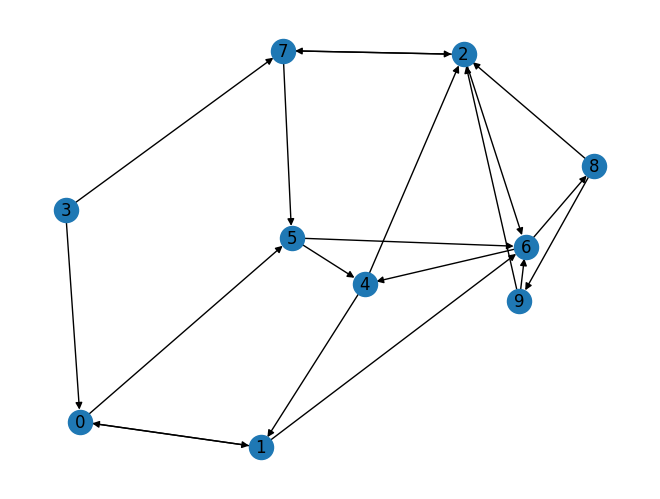

In [6]:
nw_generator = NodeWeightGenerator("random")
ew_generator = EdgeWeightGenerator("normal")
seed = 44
net = Network(nw_generator, ew_generator, num_nodes=10, k=3, seed=seed)
dp = DandelionPlusPlusProtocol(net, 0.5, seed=seed, broadcast_mode="all")
adv = DandelionAdversary(dp, adversaries=[2], seed=seed)
sim = Simulator(adv, messages=[Message(7)], seed=seed, verbose=True)
sim.run()
print(dp)
nx.draw(dp.anonymity_graph, with_labels=True)
print("captured messages", sim.adversary.captured_msgs)
print("Prediction results", sim.adversary.predict_msg_source("first_reach"))
candidates = sim.adversary._find_candidates_on_line_graph(6)
print(len(candidates), candidates)
nodes, weights = zip(*candidates)
weights = np.array(weights) / np.sum(weights)
print(pd.Series(data=weights, index=nodes))